# 1. Data Overview and Quality Check

**Objective:** Load the dataset, perform an initial inspection of its structure, identify missing values, and generate basic summary statistics.

**Dataset:** `mxmh_survey_results.csv`

## 1.1 Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('seaborn-v0_8-darkgrid')

## 1.2 Load Dataset

In [5]:
# Define the path to the raw data file
raw_data_path = '../data/raw/mxmh_survey_results.csv'

# Load the dataset into a pandas DataFrame
try:
    df_survey = pd.read_csv(raw_data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {raw_data_path}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully.


## 1.3 Display Data Structure

In [6]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
if 'df_survey' in locals():
    display(df_survey.head())

First 5 rows of the dataset:


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [7]:
# Display the shape of the DataFrame (rows, columns)
print("\nShape of the dataset (rows, columns):")
if 'df_survey' in locals():
    print(df_survey.shape)


Shape of the dataset (rows, columns):
(736, 33)


## 1.4 Show Column Information

In [8]:
# Display column names, non-null counts, and data types
print("\nColumn information (data types and non-null counts):")
if 'df_survey' in locals():
    df_survey.info()


Column information (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency 

## 1.5 Calculate Missing Values

In [9]:
# Calculate the total number of missing values per column
print("\nTotal missing values per column:")
if 'df_survey' in locals():
    missing_values = df_survey.isnull().sum()
    print(missing_values[missing_values > 0]) # Only show columns with missing values


Total missing values per column:
Age                            1
Primary streaming service      1
While working                  3
Instrumentalist                4
Composer                       1
Foreign languages              4
BPM                          107
Music effects                  8
dtype: int64


## 1.6 Visualize Missing Data Patterns


Heatmap of missing values (Yellow indicates missing data):


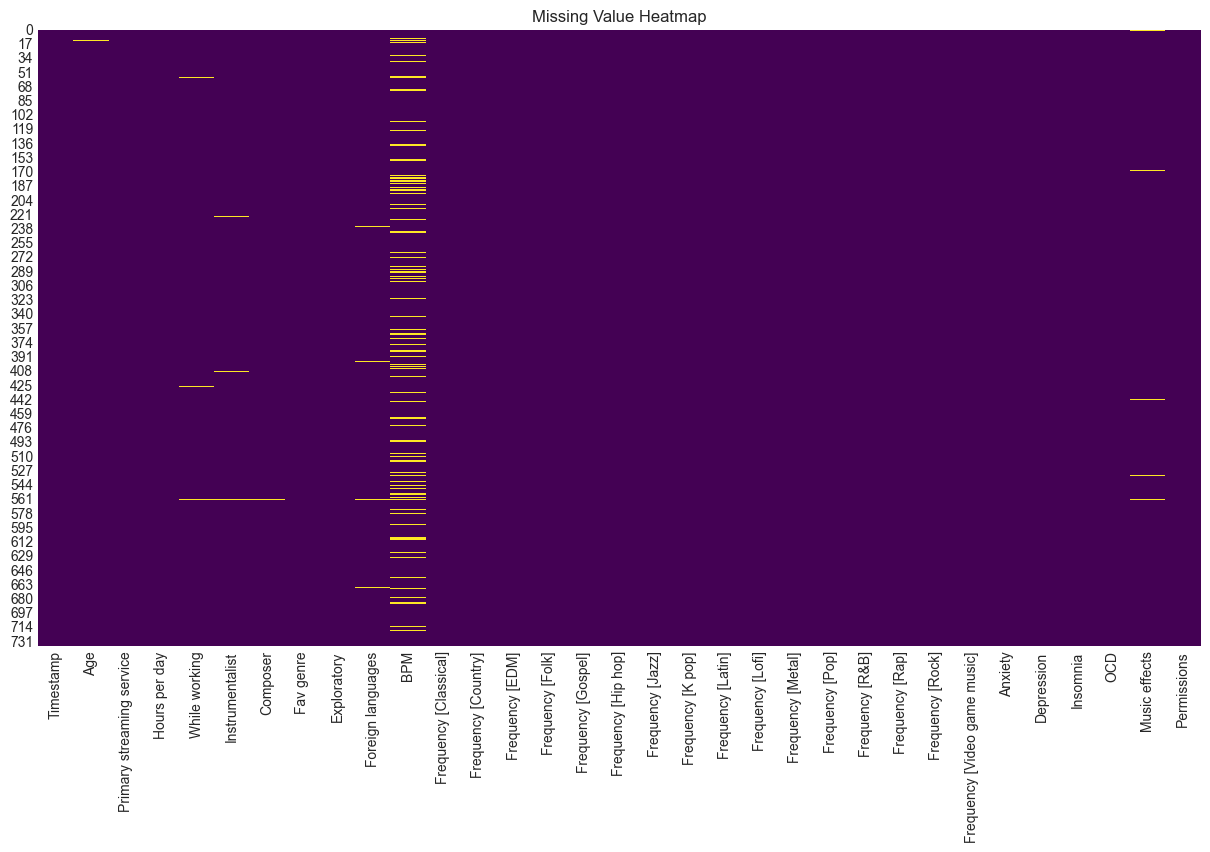

In [10]:
# Create a heatmap to visualize missing values
print("\nHeatmap of missing values (Yellow indicates missing data):")
if 'df_survey' in locals():
    plt.figure(figsize=(15, 8))
    sns.heatmap(df_survey.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Value Heatmap')
    plt.show()

## 1.7 Create Basic Statistics Summaries

In [12]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
if 'df_survey' in locals():
    # Select only numeric columns for describe()
    numeric_cols = df_survey.select_dtypes(include=np.number)
    display(numeric_cols.describe())


Descriptive statistics for numerical columns:


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [13]:
# Generate descriptive statistics for categorical/object columns
print("\nDescriptive statistics for categorical/object columns:")
if 'df_survey' in locals():
    object_cols = df_survey.select_dtypes(include='object')
    display(object_cols.describe())


Descriptive statistics for categorical/object columns:


,Timestamp,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Permissions
count,736,735,733,732,735,736,736,732,736,736,...,736,736,736,736,736,736,736,736,728,736
unique,735,6,2,2,2,16,2,2,4,4,...,4,4,4,4,4,4,4,4,3,1
top,8/28/2022 16:15:08,Spotify,Yes,No,No,Rock,Yes,Yes,Rarely,Never,...,Never,Never,Never,Very frequently,Never,Rarely,Very frequently,Never,Improve,I understand.
freq,2,458,579,497,609,188,525,404,259,343,...,443,280,264,277,225,215,330,236,542,736


## 1.8 Initial Observations

- The dataset contains **736 rows** and **33 columns**.
- Several columns have missing values, notably `Age`, `Primary streaming service`, `While working`, `Instrumentalist`, `Composer`, `Foreign languages`, `BPM`, and `Music effects`.
- `BPM` has a significant number of missing values and also contains an outlier (999999999) that needs addressing.
- `Age` has some missing values and potentially requires imputation.
- `Music effects` is the target variable and has missing values that need a strategy (removal or imputation).
- Frequency columns (`Frequency [...]`) are categorical (object type) and will need encoding.
- Mental health scores (`Anxiety`, `Depression`, `Insomnia`, `OCD`) are numerical (float64) and seem to be on a 0-10 scale, but validation is needed.
- The `Permissions` column seems irrelevant for analysis and can likely be dropped.
- `Timestamp` might be useful for time-series analysis but is likely not needed for this project's scope.